In [55]:
import networkx as nx
import plotly.plotly as py
from plotly.graph_objs import *
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
from importlib import reload
import matplotlib

In [3]:
from plotly.offline import download_plotlyjs, init_notebook_mode,  iplot, plot
init_notebook_mode(connected=True)

In [4]:
sys.path.insert(0,r'C:\Users\Javier\Documents\MEGA\Universitattt\Master\Thesis\Code\my_code')
import epsilon_module as em
import utilities as ut

In [4]:
import plotly

In [6]:
plotly.tools.set_credentials_file(username='javitox14', api_key='FNtHXULKFvBOaWPuJZe5')

In [5]:
reload(ut)

<module 'utilities' from 'C:\\Users\\Javier\\Documents\\MEGA\\Universitattt\\Master\\Thesis\\Code\\my_code\\utilities.py'>

In [6]:
G=nx.DiGraph()#  G is an empty Graph

In [48]:
dic = {0:'RUSSIA', 1:'GAZPRU', 2:'GAZPRU.Gneft', 3:'SBERBANK', 4:'ROSNEF', 5:'RUSRAI',
       6:'ALROSA', 7:'BOM', 8:'AKT', 9:'BKECON', 10:'CITMOS', 11:'EVRGSA',
       12:'LUKOIL', 13:'MBT', 14:'MDMOJC', 15:'RSBZAO', 16:'RUSAGB', 17:'VIP', 18:'VTB'}

In [ ]:
def draw_stressed_network(entities_list, rank, edge_list):
    size = np.size(entities_list)
    mst = pd.DataFrame(np.zeros((size,size)),index = entities_list,
                                            columns = entities_list)
    for e in edge_list:
        mst.loc[e[0],e[1]] = 1

    label_list = dict(enumerate(entities_list))
    reds = plt.get_cmap('Reds')
    nodes_list = []
    red_array = []
    for i in range(len(entities_list)):
        if rank[i] == 1:
            red_array.append(reds(0.99))
        else:
            red_array.append(reds(rank[i]))

        nodes_list.append(entities_list[i] + '(' + str(rank[i])[0:4] + ')')
    label_list = dict(enumerate(nodes_list))
    h = nx.from_numpy_matrix(np.matrix(mst), create_using = nx.DiGraph())
    h_aux = nx.from_numpy_matrix(np.matrix(mst))
    pos = nx.kamada_kawai_layout(h_aux)
    eigen_cen = nx.eigenvector_centrality_numpy(h_aux)
    centrality = eigen_cen.values()
    nx.draw_networkx(h, labels = label_list, edge_color = 'black',
                    node_color = red_array, node_cmap = reds,
                    node_size = [v*2000 for v in centrality], pos = pos,
                    font_size = 8)
    plt.axis('off')
    plt.show()

In [160]:
def make_annotations(pos, anno_text, font_size=14, font_color='rgb(10,10,10)'):
    L=len(pos)
    if len(anno_text)!=L:
        raise ValueError('The lists pos and text must have the same len')
    annotations = []
    for k in range(L):
        annotations.append(dict(text=anno_text[k], 
                                x=pos[k][0], 
                                y=pos[k][1]+0.075,#this additional value is chosen by trial and error
                                xref='x1', yref='y1',
                                font=dict(color= font_color, size=font_size),
                                showarrow=False)
                          )
    return annotations

def draw_stressed_network_v2(entities_list, rank, edge_list):
    ''' Draw a network where
        node size according to centrality
        node color according to probability of default
        
        Arguments:
        entities_list: list of strings
        rank: list of floats
        edge_list: list of tuples or lists
    '''
    size = np.size(entities_list)
    mst = pd.DataFrame(np.zeros((size,size)),index = entities_list,
                                            columns = entities_list)
    # Get adjacency matrix
    for e in edge_list:
        mst.loc[e[0],e[1]] = 1
    
    # Get colors and list of nodes
    reds = plt.get_cmap('Reds')
    nodes_list = []
    red_array = []
    for i in range(len(entities_list)):
        if rank[i] == 1:
            red_array.append(reds(0.99))
        else:
            red_array.append(reds(rank[i]))

        nodes_list.append(entities_list[i] + '(' + str(rank[i])[0:4] + ')')
        
    label_list = dict(enumerate(nodes_list))
    
    colors_nodes = ['rgb(' +','.join([str(a * 225) for a in matplotlib.colors.to_rgb(r)]) + ')' for r in red_array]
    
    G = nx.from_numpy_matrix(np.matrix(mst), create_using = nx.DiGraph())
    G_aux = nx.from_numpy_matrix(np.matrix(mst))
    
    eigen_cen = nx.eigenvector_centrality_numpy(G_aux)
    centrality = list(eigen_cen.values())
    
    pos = nx.kamada_kawai_layout(G_aux)
    
    Xn=[pos[k][0] for k in range(len(pos))]
    Yn=[pos[k][1] for k in range(len(pos))]
    # Define Plotly trace for nodes, here we can change color size, etc
    
    trace_nodes = dict(type = 'scatter',
                        x = Xn,
                        y = Yn,
                        mode = 'markers',
                        marker = dict(symbol = 'dot', size = [v*100 for v in, color = colors_nodes),
                        text = nodes_list)
    
    Xe=[]
    Ye=[]
    for e in G.edges():
        Xe.extend([pos[e[0]][0], pos[e[1]][0], None])
        Ye.extend([pos[e[0]][1], pos[e[1]][1], None])

    trace_edges=dict(type='scatter',
                     mode='lines',
                     x=Xe,
                     y=Ye,
                     line=dict(width=1, color='rgb(25,25,25)'),
                     hoverinfo='none' 
                    )
    axis = dict(showline = False,
                zeroline = False,
                showgrid = False,
                showticklabels = False,
                title = ''
                )
    layout = dict(title = 'MyGraph',
                font = dict(family = 'Balto'),
                width=600,
                height=600,
                autosize=False,
                showlegend=False,
                xaxis=axis,
                yaxis=axis,
                margin=dict(
                            l=40,
                            r=40,
                            b=85,
                            t=100,
                            pad=0,
                            ),
                hovermode='closest',
                plot_bgcolor='#efecea', #set background color            
                )
    data = [trace_nodes,trace_edges] 
    fig = dict(data=data, layout=layout)
    
    fig['layout'].update(annotations=make_annotations(pos, nodes_list))
    
    iplot(fig)


In [171]:
dic = {'RUSSIA':1, 'CITMOS': 0.08386627, 'GAZPRU': 0.4433951, 'SBERBANK': 0.4200649, 'LUKOIL': 0.2816123,
       'ROSNEF': 0.2684154, 'RUSAGB': 0.2307972, 'BKECON': 0.1967476, 'RUSRAI': 0.1816893,'AKT': 0.6698038,
       'VTB': 0.1766468, 'GAZPRU.Gneft': 0.1745053, 'MBT': 0.1320516, 'ALROSA': 0.1200967,
       'VIP': 0.1145055, 'EVRGSA': 0.08007537, 'MDMOJC': 0.1144015, 'BOM': 0.09896318}
rank = list(dic.values())
entities_list = list(dic.keys())
edge_list = [['AKT','BKECON'],['AKT','ROSNEF'],['AKT','RUSSIA'],['ALROSA','GAZPRU.Gneft'],['ALROSA','MBT'],
             ['ALROSA','SBERBANK'],['BKECON','MBT'],['BOM','CITMOS'],['CITMOS','BKECON'],['GAZPRU','LUKOIL'],
             ['GAZPRU','MBT'],['GAZPRU','RUSAGB'],['GAZPRU','VTB'],['GAZPRU.Gneft','VTB'],['MDMOJC','VTB'],
             ['RUSAGB','RUSRAI'],['RUSAGB','VTB'],['RUSRAI','CITMOS'],['RUSRAI','LUKOIL'],['RUSSIA','GAZPRU'],
             ['RUSSIA','SBERBANK']]

draw_stressed_network_change(entities_list, rank, edge_list)

In [170]:
def make_annotations(pos, anno_text, font_size=14, font_color='rgb(10,10,10)'):
    L=len(pos)
    if len(anno_text)!=L:
        raise ValueError('The lists pos and text must have the same len')
    annotations = []
    for k in range(L):
        annotations.append(dict(text=anno_text[k], 
                                x=pos[k][0], 
                                y=pos[k][1]+0.075,#this additional value is chosen by trial and error
                                xref='x1', yref='y1',
                                font=dict(color= font_color, size=font_size),
                                showarrow=False)
                          )
    return annotations

def draw_stressed_network_change(entities_list, rank, edge_list):
    ''' Draw a network where
        node size according to centrality
        node color according to probability of default
        
        Arguments:
        entities_list: list of strings
        rank: list of floats
        edge_list: list of tuples or lists
    '''
    size = np.size(entities_list)
    mst = pd.DataFrame(np.zeros((size,size)),index = entities_list,
                                            columns = entities_list)
    # Get adjacency matrix
    for e in edge_list:
        mst.loc[e[0],e[1]] = 1
    
    # Get colors and list of nodes
    reds = plt.get_cmap('Reds')
    nodes_list = []
    red_array = []
    for i in range(len(entities_list)):
        if rank[i] == 1:
            red_array.append(reds(0.99))
        else:
            red_array.append(reds(rank[i]))

        nodes_list.append(entities_list[i] + '(' + str(rank[i])[0:4] + ')')
        
    label_list = dict(enumerate(nodes_list))
    
    colors_nodes = ['rgb(' +','.join([str(a * 225) for a in matplotlib.colors.to_rgb(r)]) + ')' for r in red_array]
    
    G = nx.from_numpy_matrix(np.matrix(mst), create_using = nx.DiGraph())
    G_aux = nx.from_numpy_matrix(np.matrix(mst))
    
    eigen_cen = nx.eigenvector_centrality_numpy(G_aux)
    centrality = list(eigen_cen.values())
    
    pos = nx.kamada_kawai_layout(G_aux)
    
    Xn=[pos[k][0] for k in range(len(pos))]
    Yn=[pos[k][1] for k in range(len(pos))]
    # Define Plotly trace for nodes, here we can change color size, etc
    
    trace_nodes = dict(type = 'scatter',
                        x = Xn,
                        y = Yn,
                        mode = 'markers',
                        marker = dict(symbol = 'dot', size = 40, color = 'red'),
                        text = nodes_list)
    
    Xe=[]
    Ye=[]
    for e in G.edges():
        Xe.extend([pos[e[0]][0], pos[e[1]][0], None])
        Ye.extend([pos[e[0]][1], pos[e[1]][1], None])

    trace_edges=dict(type='scatter',
                     mode='lines',
                     x=Xe,
                     y=Ye,
                     line=dict(width=1, color='rgb(25,25,25)'),
                     hoverinfo='none' 
                    )
    axis = dict(showline = False,
                zeroline = False,
                showgrid = False,
                showticklabels = False,
                title = ''
                )
    layout = dict(title = 'MyGraph',
                font = dict(family = 'Balto'),
                width=600,
                height=600,
                autosize=False,
                showlegend=False,
                xaxis=axis,
                yaxis=axis,
                margin=dict(
                            l=40,
                            r=40,
                            b=85,
                            t=100,
                            pad=0,
                            ),
                hovermode='closest',
                plot_bgcolor='#efecea', #set background color            
                )
    data = [trace_nodes,trace_edges] 
    fig = dict(data=data, layout=layout)
    
    fig['layout'].update(annotations=make_annotations(pos, nodes_list))
    
    iplot(fig)


In [163]:
G = nx.DiGraph()
G.add_nodes_from(entities_list)
G.add_edges_from(edge_list)


In [164]:
G.nodes()

NodeView(('RUSSIA', 'CITMOS', 'GAZPRU', 'SBERBANK', 'LUKOIL', 'ROSNEF', 'RUSAGB', 'BKECON', 'RUSRAI', 'AKT', 'VTB', 'GAZPRU.Gneft', 'MBT', 'ALROSA', 'VIP', 'EVRGSA', 'MDMOJC', 'BOM'))

In [141]:
pos = nx.kamada_kawai_layout(G)

In [139]:
H = nx.random_geometric_graph(15,0.125)
pos = nx.get_node_attributes(H,'pos')

In [169]:
for edge in G.edges:
    print(pos[n])

[ 0.30667055 -0.65238482]
[-0.44531504  0.64069293]
[ 0.4355828  -0.06729659]
[ 0.50403599 -0.19269783]
[-0.01086032  0.29451754]
[-0.38491876 -0.20926913]
[0.65481367 0.4847559 ]
[-0.59445264 -0.01683212]
[0.1295201  0.79629227]
[-0.34289153 -0.71061698]
[0.18672071 0.39736935]
[ 0.02952994 -0.08051374]
[-0.11084477 -0.13324547]
[ 0.15861771 -0.56670952]
[ 0.08739975 -0.4964511 ]
[ 0.2521589  -0.43647074]
[-0.04146057 -0.05113995]
[-0.81430651  1.        ]


In [1]:
def make_annotations(pos, anno_text, font_size=14, font_color='rgb(10,10,10)'):
    L=len(pos)
    if len(anno_text)!=L:
        raise ValueError('The lists pos and text must have the same len')
    annotations = []
    for k in range(L):
        annotations.append(dict(text=anno_text[k], 
                                x=pos[k][0], 
                                y=pos[k][1]+0.075,#this additional value is chosen by trial and error
                                xref='x1', yref='y1',
                                font=dict(color= font_color, size=font_size),
                                showarrow=False)
                          )
    return annotations

def draw_stressed_network_v3(entities_list, rank, edge_list):
    ''' Draw a network where
        node size according to centrality
        node color according to probability of default
        
        Arguments:
        entities_list: list of strings
        rank: list of floats
        edge_list: list of tuples or lists
    '''
    size = np.size(entities_list)
    mst = pd.DataFrame(np.zeros((size,size)),index = entities_list,
                                            columns = entities_list)
    # Create Graph
    G = nx.DiGraph()
    G.add_nodes_from(entities_list)
    G.add_edges_from(edge_list)
    pos = nx.kamada_kawai_layout(G)
    
    edge_trace = Scatter(
        x = [],
        y = [],
        line = Line(width=0.5,color='#888'),
        hoverinfo='none',
        mode='lines')
    
    Xe=[]
    Ye=[]
    for e in G.edges():
        x0, y0 = pos[e]
        Xe.extend([pos[e[0]][0], pos[e[1]][0], None])
        Ye.extend([pos[e[0]][1], pos[e[1]][1], None])
    
    for edge in G.edges():
        x0, y0 = G.node[edge[0]]['pos']
    
    
    # Get adjacency matrix
    for e in edge_list:
        mst.loc[e[0],e[1]] = 1
    
    # Get colors and list of nodes
    reds = plt.get_cmap('Reds')
    nodes_list = []
    red_array = []
    for i in range(len(entities_list)):
        if rank[i] == 1:
            red_array.append(reds(0.99))
        else:
            red_array.append(reds(rank[i]))

        nodes_list.append(entities_list[i] + '(' + str(rank[i])[0:4] + ')')
        
    label_list = dict(enumerate(nodes_list))
    
    colors_nodes = ['rgb(' +','.join([str(a * 225) for a in matplotlib.colors.to_rgb(r)]) + ')' for r in red_array]
    
    G = nx.from_numpy_matrix(np.matrix(mst), create_using = nx.DiGraph())
    G_aux = nx.from_numpy_matrix(np.matrix(mst))
    
    eigen_cen = nx.eigenvector_centrality_numpy(G_aux)
    centrality = list(eigen_cen.values())
    
    pos = nx.kamada_kawai_layout(G_aux)
    
    Xn=[pos[k][0] for k in range(len(pos))]
    Yn=[pos[k][1] for k in range(len(pos))]
    # Define Plotly trace for nodes, here we can change color size, etc
    
    trace_nodes = dict(type = 'scatter',
                        x = Xn,
                        y = Yn,
                        mode = 'markers',
                        marker = dict(symbol = 'dot', size = [v*100 for v in centrality], color = colors_nodes),
                        text = nodes_list)
    
    Xe=[]
    Ye=[]
    for e in G.edges():
        Xe.extend([pos[e[0]][0], pos[e[1]][0], None])
        Ye.extend([pos[e[0]][1], pos[e[1]][1], None])

    trace_edges=dict(type='scatter',
                     mode='lines',
                     x=Xe,
                     y=Ye,
                     line=dict(width=1, color='rgb(25,25,25)'),
                     hoverinfo='none' 
                    )
    axis = dict(showline = False,
                zeroline = False,
                showgrid = False,
                showticklabels = False,
                title = ''
                )
    layout = dict(title = 'MyGraph',
                font = dict(family = 'Balto'),
                width=600,
                height=600,
                autosize=False,
                showlegend=False,
                xaxis=axis,
                yaxis=axis,
                margin=dict(
                            l=40,
                            r=40,
                            b=85,
                            t=100,
                            pad=0,
                            ),
                hovermode='closest',
                plot_bgcolor='#efecea', #set background color            
                )
    data = [trace_nodes,trace_edges] 
    fig = dict(data=data, layout=layout)
    
    fig['layout'].update(annotations=make_annotations(pos, nodes_list))
    
    iplot(fig)


In [2]:
red_array = []
reds = plt.get_cmap('Reds')
for i in range(len(entities_list)):
    if rank[i] == 1:
        red_array.append(reds(0.99))
    else:
        red_array.append(reds(rank[i]))

NameError: name 'plt' is not defined

In [68]:
entities_list

['RUSSIA',
 'CITMOS',
 'GAZPRU',
 'SBERBANK',
 'LUKOIL',
 'ROSNEF',
 'RUSAGB',
 'BKECON',
 'RUSRAI',
 'AKT',
 'VTB',
 'GAZPRU.Gneft',
 'MBT',
 'ALROSA',
 'VIP',
 'MDMOJC',
 'BOM',
 'EVRGSA']

In [50]:
red_array

[(0.4191772395232603, 0.0036908881199538626, 0.05294886582083813, 1.0),
 (0.9974163783160324, 0.9065282583621684, 0.8636678200692041, 1.0),
 (0.9860976547481738, 0.48704344482891193, 0.3615532487504806, 1.0),
 (0.9868358323721645, 0.5165705497885429, 0.3910803537101115, 1.0),
 (0.9882352941176471, 0.6917185697808534, 0.5836678200692041, 1.0),
 (0.9882352941176471, 0.7118954248366013, 0.606797385620915, 1.0),
 (0.9894040753556325, 0.754955786236063, 0.6600076893502499, 1.0),
 (0.9916186082276048, 0.795924644367551, 0.7142637447135717, 1.0),
 (0.9926028450595925, 0.8141330257593233, 0.7383775470972702, 1.0),
 (0.8857670126874279, 0.18131487889273357, 0.1510957324106113, 1.0),
 (0.9928489042675894, 0.8186851211072664, 0.7444059976931949, 1.0),
 (0.9930949634755863, 0.8232372164552095, 0.7504344482891195, 1.0),
 (0.9958016147635524, 0.8733102652825836, 0.8167474048442906, 1.0),
 (0.9963091118800461, 0.883275663206459, 0.8304498269896193, 1.0),
 (0.9964321414840446, 0.8858592848904268, 0.83

In [111]:
edges=np.array([(2,3), (3, 1), (1, 0)], dtype=np.uint8)
nodes_loc=np.array([[0.3, 0.7], [1.2, 2.6], [2, 3.5], [0.85, 0.5]])
colors_nodes = ['red', 'green', 'magenta','blue']
colors_nodes = ['rgb(94.31487889273357, 0.8304498269896191, 11.91349480968858)',
                'rgb(224.41868512110727, 203.9688581314879, 194.3252595155709)',
                'rgb(221.8719723183391, 109.58477508650519, 81.34948096885815)','rgb(215.3,125.4,220.453452)']

colors=['red', 'green', 'magenta']
nodes=dict(type='scatter',
           x=nodes_loc[:,0],
           y=nodes_loc[:,1],
           mode='markers',
           marker=dict(size=40, color=colors_nodes))

edges_list=[ dict(type='scatter',
             x=[nodes_loc[e[0]][0], nodes_loc[e[1]][0]],
             y=[nodes_loc[e[0]][1], nodes_loc[e[1]][1]],
              mode='lines',
              line=dict(width=2, color=colors[k]))  for k, e in enumerate(edges)]
axis = dict(showline = False,
            zeroline = False,
            showgrid = False,
            showticklabels = False,
            title = ''
            )
layout = dict(title = 'MyGraph',
            font = dict(family = 'Balto'),
            width=600,
            height=600,
            autosize=False,
            showlegend=False,
            xaxis=axis,
            yaxis=axis,
            margin=dict(
                        l=40,
                        r=40,
                        b=85,
                        t=100,
                        pad=0,
                        ),
            hovermode='closest',
            plot_bgcolor='#efecea', #set background color            
            )
data=edges_list+[nodes]
fig=dict(data=data, layout=layout)
iplot(fig)

In [184]:
dic = {'RUSSIA':1, 'CITMOS': 0.08386627, 'GAZPRU': 0.4433951, 'SBERBANK': 0.4200649, 'LUKOIL': 0.2816123,
       'ROSNEF': 0.2684154, 'RUSAGB': 0.2307972, 'BKECON': 0.1967476, 'RUSRAI': 0.1816893,'AKT': 0.6698038,
       'VTB': 0.1766468, 'GAZPRU.Gneft': 0.1745053, 'MBT': 0.1320516, 'ALROSA': 0.1200967,
       'VIP': 0.1145055, 'EVRGSA': 0.08007537, 'MDMOJC': 0.1144015, 'BOM': 0.09896318}

rank = list(dic.values())
entities_list = list(dic.keys())
edge_list = [['AKT','BKECON'],['AKT','ROSNEF'],['AKT','RUSSIA'],['ALROSA','GAZPRU.Gneft'],['ALROSA','MBT'],
             ['ALROSA','SBERBANK'],['BKECON','MBT'],['BOM','CITMOS'],['CITMOS','BKECON'],['GAZPRU','LUKOIL'],
             ['GAZPRU','MBT'],['GAZPRU','RUSAGB'],['GAZPRU','VTB'],['GAZPRU.Gneft','VTB'],['MDMOJC','VTB'],
             ['RUSAGB','RUSRAI'],['RUSAGB','VTB'],['RUSRAI','CITMOS'],['RUSRAI','LUKOIL'],['RUSSIA','GAZPRU'],
             ['RUSSIA','SBERBANK']]

In [187]:
# BDs precrisis with 
my_nodes = range(19)
G = nx.DiGraph()
labels = ['RUSSIA', 'GAZPRU', 'GAZPRU.Gneft', 'SBERBANK', 'ROSNEF', 'RUSRAI', 'ALROSA', 'BOM',
          'AKT', 'BKECON', 'CITMOS', 'EVRGSA', 'LUKOIL', 'MBT', 'MDMOJC', 'RSBZAO', 'RUSAGB', 'VIP', 'VTB']
G.add_nodes_from(list(dic.keys()))
my_edges = [(0,1),(0,3),(1,12),(1,13),(1,16),(1,18),(2,18),(5,10),(5,12),
           (6,3),(6,2),(6,13),(7,10),(8,9),(8,4),(8,0),(9,13),(10,9),
           (14,18),(16,5),(16,18)]
G.add_edges_from(edge_list)
pos = nx.kamada_kawai_layout(G)

In [177]:
pos = {}

In [181]:
pos

{0: array([0.33928957, 0.68794855]),
 1: array([0.34337351, 0.15828341]),
 2: array([0.32618079, 0.08192598]),
 3: array([0.26976444, 0.20976516]),
 4: array([0.05217585, 0.51231917]),
 5: array([-0.13494169, -0.53078425]),
 6: array([-0.08724237, -0.10216269]),
 7: array([-1.        , -0.50747304]),
 8: array([-0.22001325,  0.87386864]),
 9: array([-0.58644454,  0.32958044]),
 10: array([-0.60145907, -0.27233858]),
 11: array([-0.39890977, -0.21581184]),
 12: array([-0.13104321, -0.06081012]),
 13: array([-0.13334878,  0.33394655]),
 14: array([ 0.36131692, -0.32408438]),
 15: array([ 0.11122832, -0.43972074]),
 16: array([ 0.38571328, -0.36969258]),
 17: array([ 0.35793834, -0.27846424]),
 18: array([ 0.74642167, -0.08629545])}

In [188]:
Xn=[pos[k][0] for k in range(len(pos))]
Yn=[pos[k][1] for k in range(len(pos))]
# Define Plotly trace for nodes, here we can change color size, etc
# Get colors and list of nodes
reds = plt.get_cmap('Reds')
nodes_list = []
red_array = []
for i in range(len(entities_list)):
    if rank[i] == 1:
        red_array.append(reds(0.99))
    else:
        red_array.append(reds(rank[i]))

    nodes_list.append(entities_list[i] + '(' + str(rank[i])[0:4] + ')')

label_list = dict(enumerate(nodes_list))

colors_nodes = ['rgb(' +','.join([str(a * 225) for a in matplotlib.colors.to_rgb(r)]) + ')' for r in red_array]

trace_nodes=dict(type='scatter',
                 x=Xn, 
                 y=Yn,
                 mode='markers',
                 marker=dict(symbol='dot', size=10, color=colors_nodes),
                 text=labels,
                 hoverinfo='text')
Xe=[]
Ye=[]
for e in G.edges():
    Xe.extend([pos[e[0]][0], pos[e[1]][0], None])
    Ye.extend([pos[e[0]][1], pos[e[1]][1], None])
    
trace_edges=dict(type='scatter',
                 mode='lines',
                 x=Xe,
                 y=Ye,
                 line=dict(width=1, color='rgb(25,25,25)'),
                 hoverinfo='none' 
                )
axis = dict(showline = False,
            zeroline = False,
            showgrid = False,
            showticklabels = False,
            title = ''
            )
layout = dict(title = 'MyGraph',
            font = dict(family = 'Balto'),
            width=600,
            height=600,
            autosize=False,
            showlegend=False,
            xaxis=axis,
            yaxis=axis,
            margin=dict(
                        l=40,
                        r=40,
                        b=85,
                        t=100,
                        pad=0,
                        ),
            hovermode='closest',
            plot_bgcolor='#efecea', #set background color            
            )
fig = dict(data=[trace_edges, trace_nodes], layout=layout)

KeyError: 0

In [186]:
iplot(fig)

In [63]:
def make_annotations(pos, anno_text, font_size=14, font_color='rgb(10,10,10)'):
    L=len(pos)
    if len(anno_text)!=L:
        raise ValueError('The lists pos and text must have the same len')
    annotations = []
    for k in range(L):
        annotations.append(dict(text=anno_text[k], 
                                x=pos[k][0], 
                                y=pos[k][1]+0.075,#this additional value is chosen by trial and error
                                xref='x1', yref='y1',
                                font=dict(color= font_color, size=font_size),
                                showarrow=False)
                          )
    return annotations

In [64]:
fig['layout'].update(annotations=make_annotations(pos, labels))

In [65]:
iplot(fig)

In [76]:
central = {}
for i in range(19):
    central[dic[i]] = [nx.in_degree_centrality(G)[i],nx.out_degree_centrality(G)[i]]

In [80]:
undir_central = {}
for i in range(19):
    undir_central[dic[i]] = nx.degree_centrality(G)[i]

In [92]:
pos = nx.spring_layout(g)

In [96]:
label_list = dict(enumerate(net_stats['Entities'].tolist()))

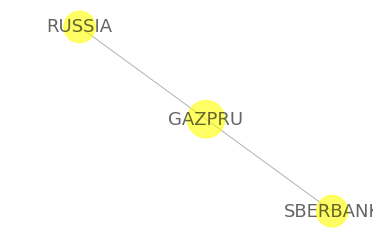

In [111]:
nx.draw_networkx(g, labels = label_list, node_color = 'yellow', node_size = [v*2000 for v in list(eig_cen.values())],
                edge_color = 'gray', pos = pos, font_size = 18, font_color = 'black', alpha = 0.6)
plt.axis('off')
plt.show()

In [112]:
edge_list = [['AKT','BKECON'],['AKT','ROSNEF'],['AKT','RUSSIA'],['ALROSA','GAZPRU.Gneft'],['ALROSA','MBT'],
             ['ALROSA','SBERBANK'],['BKECON','MBT'],['BOM','CITMOS'],['CITMOS','BKECON'],['GAZPRU','LUKOIL'],
             ['GAZPRU','MBT'],['GAZPRU','RUSAGB'],['GAZPRU','VTB'],['GAZPRU.Gneft','VTB'],['MDMOJC','VTB'],
             ['RUSAGB','RUSRAI'],['RUSAGB','VTB'],['RUSRAI','CITMOS'],['RUSRAI','LUKOIL'],['RUSSIA','GAZPRU'],
             ['RUSSIA','SBERBANK']]

In [118]:
rank = [1, 0.6698038, 0.4433951, 0.4200649, 0.2816123, 0.2684154, 0.2307972,
        0.1967476, 0.1816893, 0.1766468, 0.1745053, 0.1320516, 0.1200967,
        0.1145055, 0.1144015, 0.09896318, 0.08386627, 0.08007537]

In [ ]:
entities = ['RUSSIA', 'GAZPRU', 'GAZPRU.Gneft', 'SBERBANK', 'ROSNEF', 'RUSRAI', 'ALROSA', 'BOM',
          'AKT', 'BKECON', 'CITMOS', 'EVRGSA', 'LUKOIL', 'MBT', 'MDMOJC', 'RSBZAO', 'RUSAGB', 'VIP', 'VTB']

In [131]:
dic = {'RUSSIA':1, 'CITMOS': 0.08386627, 'GAZPRU': 0.4433951, 'SBERBANK': 0.4200649, 'LUKOIL': 0.2816123,
       'ROSNEF': 0.2684154, 'RUSAGB': 0.2307972, 'BKECON': 0.1967476, 'RUSRAI': 0.1816893,'AKT': 0.6698038,
       'VTB': 0.1766468, 'GAZPRU.Gneft': 0.1745053, 'MBT': 0.1320516, 'ALROSA': 0.1200967,
       'VIP': 0.1145055, 'MDMOJC': 0.1144015, 'BOM': 0.09896318, 'EVRGSA': 0.08007537}

In [175]:
reload(ut)

<module 'utilities' from 'C:\\Users\\Javier\\Documents\\MEGA\\Universitattt\\Master\\Thesis\\Code\\my_code\\utilities.py'>

c:\users\javier\anaconda3\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning:

invalid value encountered in sqrt



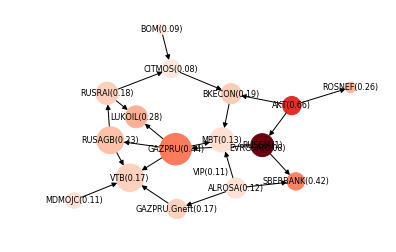

In [176]:
ut.draw_stressed_network(list(dic.keys()),list(dic.values()), edge_list)

In [137]:
entities_list = list(dic.keys())

In [136]:
rank = list(dic.values())

In [139]:
size = np.size(entities_list)
mst = pd.DataFrame(np.zeros((size,size)),index = entities_list,
                                        columns = entities_list)
for e in edge_list:
    mst.loc[e[0],e[1]] = 1

label_list = dict(enumerate(entities_list))
reds = plt.get_cmap('Reds')
nodes_list = []
red_array = []
for i,e in label_list.items():
    if rank[i] == 1:
        red_array.append(reds(0.99))
    else:
        red_array.append(reds(rank[i]))

    nodes_list.append(e + '(' + str(rank[i])[0:4] + ')')

In [153]:
h = nx.from_numpy_matrix(np.matrix(mst), create_using = nx.DiGraph())
h2 = nx.from_numpy_matrix(np.matrix(mst))

In [155]:
pos = nx.circular_layout(h)

In [157]:
eigen_cen = nx.eigenvector_centrality_numpy(h)
eigen_cen2 = nx.eigenvector_centrality_numpy(h2)